In [89]:
import pandas as pd
from scipy.linalg import svd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, legend, plot, show, title, xlabel, ylabel

In [188]:
df = pd.read_csv('preprocessed_data.csv')

In [189]:
discrete_vars = df.select_dtypes(include=['object']).columns.tolist()

In [190]:
df_encoded = pd.get_dummies(df, columns=discrete_vars, drop_first=True).astype(int)

In [191]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1897 entries, 0 to 1896
Data columns (total 86 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   monthly_rent               1897 non-null   int64
 1   monthly_aconto             1897 non-null   int64
 2   move_in_price              1897 non-null   int64
 3   size_sqm                   1897 non-null   int64
 4   rooms                      1897 non-null   int64
 5   floor                      1897 non-null   int64
 6   deposit                    1897 non-null   int64
 7   prepaid_rent               1897 non-null   int64
 8   housing_type_Værelse       1897 non-null   int64
 9   furnished_Nej              1897 non-null   int64
 10  roommate_friendly_Ja       1897 non-null   int64
 11  roommate_friendly_Nej      1897 non-null   int64
 12  pets_allowed_Ja            1897 non-null   int64
 13  pets_allowed_Nej           1897 non-null   int64
 14  elevator_Ja             

### PCA

In [192]:
X = df_encoded.to_numpy()
N = X.shape[0]

In [193]:
mean = np.mean(X, axis=0)
X_centered = X - mean

# Step 2: Compute covariance matrix
cov_matrix = np.cov(X_centered.T)

# Step 3: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sort eigenvalues and eigenvectors
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Step 5: Project data onto principal components
X_pca = np.dot(X_centered, eigenvectors[:, :2])

# Results
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)
print("Projected Data (PCA):\n", X_pca)

Eigenvalues: [7.15732915e+11 4.40747975e+10 5.87972793e+09 1.49680611e+09
 2.40289527e+08 1.62692122e+03 5.52545636e+00 1.21752930e+00
 5.88522232e-01 4.21229231e-01 3.79109582e-01 3.54366648e-01
 3.19926042e-01 2.78538251e-01 2.72386148e-01 2.45521529e-01
 2.20631901e-01 2.13338528e-01 1.84971731e-01 1.49377877e-01
 1.27645677e-01 1.21329503e-01 1.17487408e-01 1.00260664e-01
 9.32644306e-02 8.99382463e-02 7.15665851e-02 6.52012247e-02
 5.84301743e-02 5.66067934e-02 5.05922286e-02 4.62553460e-02
 4.33196782e-02 4.13671981e-02 3.88080024e-02 3.86619797e-02
 3.61002958e-02 3.50235113e-02 3.42066368e-02 3.21556320e-02
 2.93575688e-02 2.84697814e-02 2.73628800e-02 2.53316367e-02
 2.46917948e-02 2.33597377e-02 2.25035458e-02 2.17590991e-02
 2.02998929e-02 1.99737533e-02 1.78316631e-02 1.71983027e-02
 1.61074925e-02 1.49619367e-02 1.39402708e-02 1.33070031e-02
 1.24237609e-02 1.04536059e-02 9.96977898e-03 9.17471869e-03
 8.96502201e-03 7.73324921e-03 7.41616324e-03 7.20738629e-03
 6.69209441

We need 2 components to explain at least 95% of the variance of the data


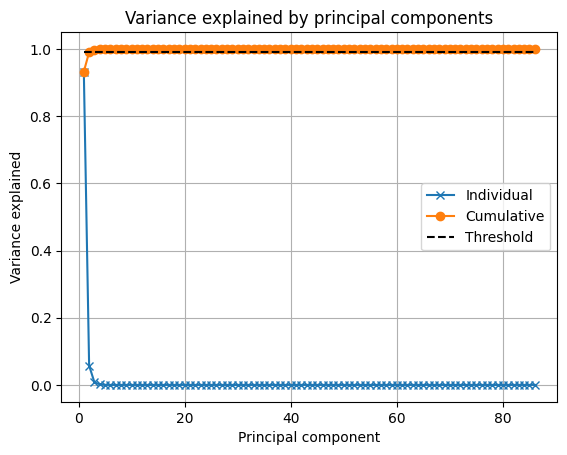

In [194]:
rho = eigenvalues / eigenvalues.sum()
threshold = 0.99

for i in range(len(eigenvalues)):
    if np.cumsum(rho)[i] > threshold:
        print(f'We need {i+1} components to explain at least 95% of the variance of the data')
        break

# Plot variance explained
plt.figure()
plt.plot(range(1, len(rho) + 1), rho, "x-")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
plt.plot([1, len(rho)], [threshold, threshold], "k--")
plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend(["Individual", "Cumulative", "Threshold"])
plt.grid()
plt.show()

### SVD

2 components/variables needed to surpass the threshold=0.99


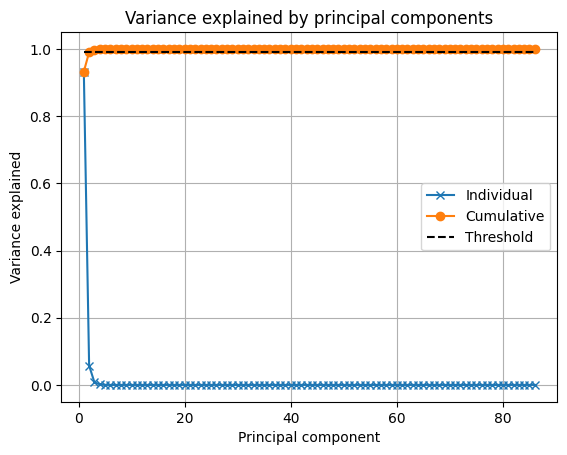

In [195]:
# Subtract mean value from data
Y = X - np.ones((N, 1)) * X.mean(axis=0)

# PCA by computing SVD of Y
U, S, V = svd(Y, full_matrices=False)

# Compute variance explained by principal components
rho = (S * S) / (S * S).sum()

threshold = 0.99

for i in range(len(rho)):
    if np.cumsum(rho)[i] > threshold:
        print(f'{i+1} components/variables needed to surpass the threshold={threshold}')
        break


# Plot variance explained
plt.figure()
plt.plot(range(1, len(rho) + 1), rho, "x-")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
plt.plot([1, len(rho)], [threshold, threshold], "k--")
plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend(["Individual", "Cumulative", "Threshold"])
plt.grid()
plt.show()

In [196]:
loadings_pc1 = V[0,:]
loadings_pc2 = V[1,:]

In [197]:
# Get the indices of the top 5 highest values
top_indices1 = np.argsort(loadings_pc1)[-5:]  # Get last 5 indices after sorting
top_indices_sorted1 = top_indices1[np.argsort(-loadings_pc1[top_indices1])]

top_indices2 = np.argsort(loadings_pc2)[-5:]  # Get last 5 indices after sorting
top_indices_sorted2 = top_indices2[np.argsort(-loadings_pc2[top_indices2])]

In [198]:
print('First Principal Component:\n')

for idx in top_indices_sorted1:
    print(f'{df_encoded.columns[idx]} with coefficient: {loadings_pc1[idx]}',end='\n')

print('\n#############################################################')
print('\nSecond Principal Component:\n')

for idx in top_indices_sorted2:
    print(f'{df_encoded.columns[idx]} with coefficient: {loadings_pc2[idx]}',end='\n')


First Principal Component:

move_in_price with coefficient: 0.9089161658256466
deposit with coefficient: 0.36116043241052903
prepaid_rent with coefficient: 0.1590942032994749
monthly_rent with coefficient: 0.13457803461341833
monthly_aconto with coefficient: 0.0035117818250406385

#############################################################

Second Principal Component:

deposit with coefficient: 0.8272637081616676
prepaid_rent with coefficient: 0.3153878566455721
monthly_rent with coefficient: 0.20902239622811347
size_sqm with coefficient: 3.501683729381644e-06
rooms with coefficient: 1.8819695476839093e-07


In [199]:
df1 = pd.read_csv('preprocessed_data.csv')

In [200]:
classLabels = df1['energy_mark'].tolist()
classNames = set(classLabels)
classDict = dict(zip(classNames, range(len(classNames))))

# Extract vector y, convert to NumPy array
y = np.asarray([classDict[value] for value in classLabels])

Text(0, 0.5, 'PC2')

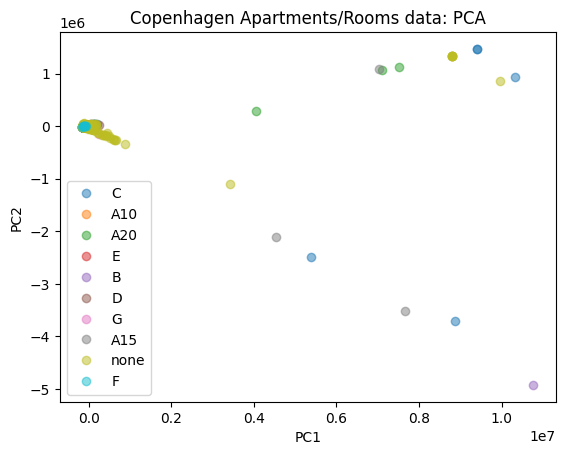

In [202]:
# Project the centered data onto principal component space
Z = Y @ V.T

# Indices of the principal components to be plotted
i = 0
j = 1

# Plot PCA of the data
f = figure()
title("Copenhagen Apartments/Rooms data: PCA")
# Z = array(Z)
for c in range(len(classNames)):
    # select indices belonging to class c:
    class_mask = y == c
    plot(Z[class_mask, i], Z[class_mask, j], "o", alpha=0.5)
legend(classNames)
xlabel("PC{0}".format(i + 1))
ylabel("PC{0}".format(j + 1))